In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px

import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
# update file path depending in your folder structure
file='/content/v5_20240204_094535_166m.csv'

In [ ]:
df=pd.read_csv(file)
print(df.shape)

(99578, 44)


### Drop duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#Verify
print('initial shape \n(99578, 44)')
print(df.shape)

initial shape 
(99578, 44)
(9977, 44)


### Convert time series

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99578 entries, 0 to 99577
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 99578 non-null  object 
 1   accelX(g)                 99578 non-null  float64
 2   accelY(g)                 99578 non-null  float64
 3   accelZ(g)                 99578 non-null  float64
 4   accelUserX(g)             99578 non-null  float64
 5   accelUserY(g)             99578 non-null  float64
 6   accelUserZ(g)             99578 non-null  float64
 7   gyroX(rad/s)              99578 non-null  float64
 8   gyroY(rad/s)              99578 non-null  float64
 9   gyroZ(rad/s)              99578 non-null  float64
 10  Roll(rads)                99578 non-null  float64
 11  Pitch(rads)               99578 non-null  float64
 12  Yaw(rads)                 99578 non-null  float64
 13  m11                       99578 non-null  float64
 14  m12   

In [ ]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ns')

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99578 entries, 0 to 99577
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 99578 non-null  datetime64[ns]
 1   accelX(g)                 99578 non-null  float64       
 2   accelY(g)                 99578 non-null  float64       
 3   accelZ(g)                 99578 non-null  float64       
 4   accelUserX(g)             99578 non-null  float64       
 5   accelUserY(g)             99578 non-null  float64       
 6   accelUserZ(g)             99578 non-null  float64       
 7   gyroX(rad/s)              99578 non-null  float64       
 8   gyroY(rad/s)              99578 non-null  float64       
 9   gyroZ(rad/s)              99578 non-null  float64       
 10  Roll(rads)                99578 non-null  float64       
 11  Pitch(rads)               99578 non-null  float64       
 12  Yaw(rads)         

### Reduce sampling rate

In [ ]:
# Set the 'Timestamp' column as the DataFrame's index
df.set_index('Timestamp', inplace=True)

In [ ]:
# resample the DataFrame to have roughly one snapshot per second and select the first value within each second
df_resampled = df.resample('S').first()
df_resampled.shape

(9977, 43)

In [ ]:
# Reset the index to create a standard numerical index
df_resampled.reset_index(inplace=True)

In [ ]:
df_resampled.shape

(9977, 44)

In [ ]:
# export to CSV
df_resampled.to_csv('df_166_reduced_sample_rate.csv', index=False)

### Label data to prepare for supervised learning

In [ ]:
file_resampled='/content/df_166_reduced_sample_rate.csv'
df=pd.read_csv(file_resampled)
print(df.shape)
df.head()

(9977, 44)


,Timestamp,accelX(g),accelY(g),accelZ(g),accelUserX(g),accelUserY(g),accelUserZ(g),gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),...,ActivityType,ActivityConfidence,Pressure(kilopascals),RelativeAltitude(meters),magX(µT),magY(µT),magZ(µT),calMagX(µT),calMagY(µT),calMagZ(µT)
0,2024-02-04 09:45:35,0.1922,-0.3479,-0.9826,0.0070,0.1008,0.0347,-0.2991,0.1544,-0.0899,...,Unknown,High,76.1190,0.0000,453.5881,-134.0068,-256.9979,-9.0679,-27.6036,-45.7127
1,2024-02-04 09:45:36,0.0908,-0.3970,-0.6866,-0.0714,0.0364,0.2205,0.2636,-0.0981,0.1425,...,Unknown,High,76.1190,0.0000,454.2118,-134.6189,-255.8427,-8.6285,-27.0907,-45.4847
2,2024-02-04 09:45:37,0.0375,-0.3651,-0.9360,-0.0546,0.0005,-0.0351,0.3272,-0.2148,0.1573,...,Unknown,High,76.1097,0.9802,440.7044,-129.3311,-257.2758,-22.6558,-22.7829,-46.3289
3,2024-02-04 09:45:38,0.0144,-0.2673,-0.8922,-0.0412,-0.0190,0.0732,0.0626,0.0634,0.2389,...,Unknown,High,76.1004,1.9604,439.4838,-126.7298,-256.5003,-23.4059,-19.9219,-45.7558
4,2024-02-04 09:45:39,0.1912,-0.4596,-0.8941,0.0340,-0.0016,-0.0177,-0.3062,-0.1541,-0.4590,...,Unknown,High,76.0811,3.9846,447.4849,-140.8846,-252.6759,-15.0221,-33.9742,-42.2803


In [ ]:
# drop rows with missing values
print('initial shape (9977, 44)')
df.dropna(inplace=True)
print(f'new shape: {df.shape}')

initial shape (9977, 44)
new shape: (9977, 44)


In [ ]:
# Create the scatter plot using Plotly Express
fig = px.scatter(df,
                 x=df['Timestamp'],
                 y=df['Alt(m)'])

# Update the layout with title and axis labels
fig.update_layout(
        title='Altitude over Time',
        xaxis_title='Timestamp',
        yaxis_title='Altitude (m)',
        coloraxis_colorbar=dict(title='Cluster Label')
    )

# Show the Plotly figure
fig.show()

In [ ]:
# Initialize 'on_lift' column to 0
df['on_lift'] = 0

In [ ]:
df['Timestamp']

0       2024-02-04 09:45:35
1       2024-02-04 09:45:36
2       2024-02-04 09:45:37
3       2024-02-04 09:45:38
4       2024-02-04 09:45:39
               ...         
9972    2024-02-04 12:31:47
9973    2024-02-04 12:31:48
9974    2024-02-04 12:31:49
9975    2024-02-04 12:31:50
9976    2024-02-04 12:31:51
Name: Timestamp, Length: 9977, dtype: object

In [ ]:
# Manually noted timestamps for lift rides
lift_rides = [
    ('2024-02-04 09:45:35', '2024-02-04 09:50:31'),
    ('2024-02-04 09:58:05', '2024-02-04 10:04:01'),
    ('2024-02-04 10:08:21', '2024-02-04 10:12:10'),
    ('2024-02-04 10:26:50', '2024-02-04 10:30:45'),
    ('2024-02-04 10:51:01', '2024-02-04 10:55:49'),
    ('2024-02-04 11:54:00', '2024-02-04 11:59:29'),
    ('2024-02-04 12:04:24', '2024-02-04 12:07:35'),
]

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
# update 'on_lift' column
for start, end in lift_rides:
    start_time = pd.to_datetime(start)
    end_time = pd.to_datetime(end)
    df.loc[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time), 'on_lift'] = 1

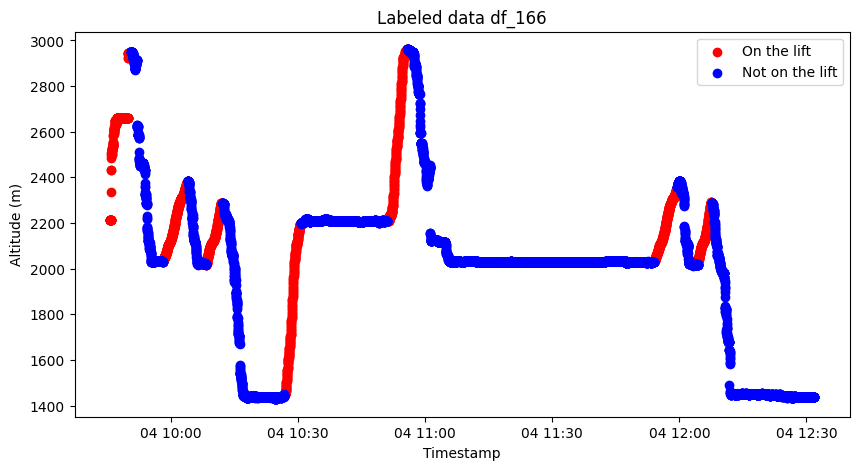

In [ ]:
#def plot_results()
    # Plot for Altitude over Time, colored by 'on_lift' status
plt.figure(figsize=(10, 5))

    # Plot points where 'on_lift' is 1 with one color
plt.scatter(df.loc[df['on_lift'] == 1, 'Timestamp'],
                df.loc[df['on_lift'] == 1, 'Alt(m)'],
                c='red',
                label='On the lift',
                marker='o')

    # Plot points where 'on_lift' is 0 with another color
plt.scatter(df.loc[df['on_lift'] == 0, 'Timestamp'],
                df.loc[df['on_lift'] == 0, 'Alt(m)'],
                c='blue',
                label='Not on the lift',
                marker='o')

plt.title('Labeled data df_166')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.legend()
plt.show()

In [ ]:
# export to CSV
df.to_csv('df_166m.csv', index=False)